This Jupyter notebook can be viewed on `nbviewer` at: https://nbviewer.org/github/Mustardburger/BRN-assignments/blob/main/Python_for_Data_Science/Statistical_Testing.ipynb

In [1]:
!pip install -q plotly==5.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 38.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import linregress

# Guided section

## 1. Read in the `gapminder_clean.csv` data as a `pandas DataFrame`.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bioinformatics/BRN/Testing_Assignments_Python/gapminder_clean.csv")

In [ ]:
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


## 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

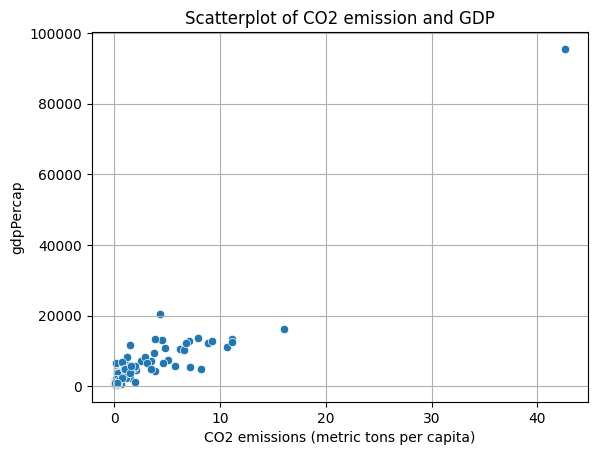

In [ ]:
df_1962 = df[df["Year"] == 1962]
df_1962 = df_1962.dropna(subset=["CO2 emissions (metric tons per capita)", "gdpPercap"])

fig, ax = plt.subplots()
sns.scatterplot(data=df_1962, x="CO2 emissions (metric tons per capita)", y="gdpPercap", ax=ax)
ax.grid()
ax.set_title("Scatterplot of CO2 emission and GDP")
plt.show()

## 3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

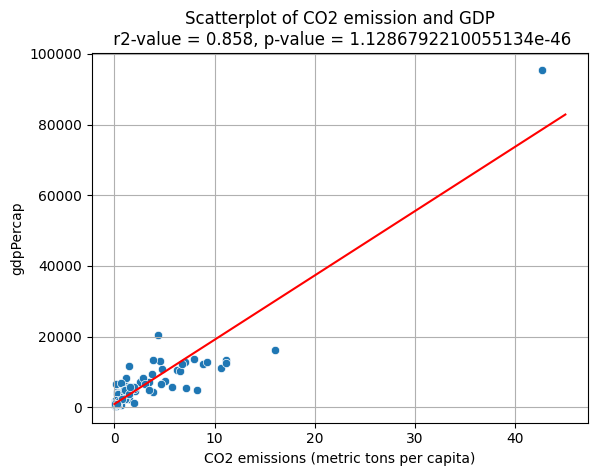

In [ ]:
co2_emis = df_1962["CO2 emissions (metric tons per capita)"].tolist()
gdp = df_1962["gdpPercap"].tolist()

# Calculate the correlation
slope, intercept, rval, pval, stderr = linregress(co2_emis, gdp)

# Make the plot
x = np.linspace(0, 45, 1000)
y = slope*x + intercept
fig, ax = plt.subplots()
sns.scatterplot(data=df_1962, x="CO2 emissions (metric tons per capita)", y="gdpPercap", ax=ax)
ax.plot(x, y, "r-")
ax.grid()
ax.set_title(f"Scatterplot of CO2 emission and GDP\n r2-value = {rval**2:.3f}, p-value = {pval}")
plt.show()

## 4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

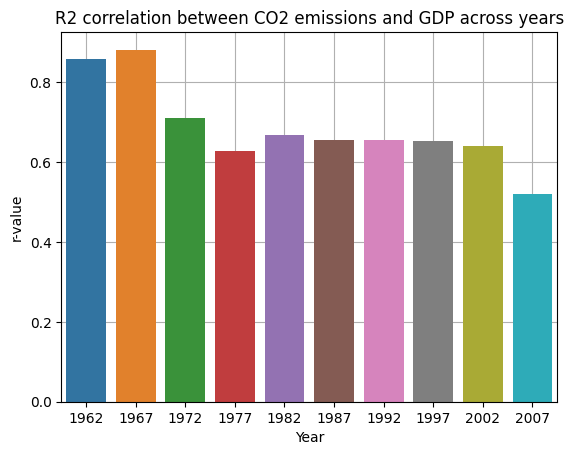

Year with highest correlation: 1967


In [ ]:
years = df["Year"].unique()
max_corr = 0

rows = []

for year in years:
  df_filtered = df[df["Year"] == year]
  df_filtered = df_filtered.dropna(subset=["CO2 emissions (metric tons per capita)", "gdpPercap"]).reset_index(drop=True)
  co2_emis = df_filtered["CO2 emissions (metric tons per capita)"].tolist()
  gdp = df_filtered["gdpPercap"].tolist()

  # Calculate the correlation
  slope, intercept, rval, pval, stderr = linregress(co2_emis, gdp)
  rows.append([year, rval**2])

  if max_corr < rval:
    max_corr = rval
    max_year = year

# Draw a plot
rval_df = pd.DataFrame(rows, columns=["Year", "r-value"])

fig, ax = plt.subplots()
sns.barplot(rval_df, x="Year", y="r-value", ax=ax)
ax.grid()
ax.set_axisbelow(True)
ax.set_title("R2 correlation between CO2 emissions and GDP across years")
plt.show()

# Print
print(f"Year with highest correlation: {max_year}")

## 5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [ ]:
df_year_highest_r = df[df["Year"] == max_year]

fig = px.scatter(df_year_highest_r, x="CO2 emissions (metric tons per capita)", y="gdpPercap", color="continent", size="pop")
fig.update_xaxes(range=[0, 20])
fig.update_yaxes(range=[0, 25000])
fig.show()

# Unguided section

## 1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

Load the DataFrame and drop rows with NaN values

In [11]:
# Assume this analysis is across all years
df = pd.read_csv("/content/drive/MyDrive/Bioinformatics/BRN/Testing_Assignments_Python/gapminder_clean.csv")
df_filtered = df.dropna(subset=["continent", "Energy use (kg of oil equivalent per capita)"]).reset_index(drop=True)
df_continent_only = df_filtered[["continent", "Energy use (kg of oil equivalent per capita)"]]
df_continent_only.columns = ["continent", "energy_use"]

Check distributions of energy use for each continent

In [12]:
fig = px.box(
    df_filtered,
    x="continent",
    y="Energy use (kg of oil equivalent per capita)",

    title="Distribution of energy use across continents"
)
fig.show()

To compare the difference mean of a variable (here is energy use) across more than 2 groups (here are continents), we use ANOVA.

The hypothesis testing is as follows:
* Null hypothesis: There is no difference of energy use across continents
* Alternative hypothesis: There is a difference of energy use across continents

The critical p-value is 0.05

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('energy_use ~ C(continent)', data=df_continent_only).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [14]:
anova_table

,sum_sq,df,F,PR(>F)
C(continent),7.714825e+08,4.0,51.459158,8.527003e-39
Residual,3.159592e+09,843.0,NaN,NaN


From the table, the calculated p-value is 0.0001, which is smaller than 0.05. Therefore, we reject the null hypothesis and conclude that there is a difference of energy use across continents.

We now want to know which two continents have the statistically significant difference in energy use. Therefore, we perform Tukey's test.

In [15]:
# Post-hoc test: Tukey
from scipy.stats import tukey_hsd

europe = df_continent_only[df_continent_only["continent"] == "Europe"]["energy_use"].tolist()
africa = df_continent_only[df_continent_only["continent"] == "Africa"]["energy_use"].tolist()
americas = df_continent_only[df_continent_only["continent"] == "Americas"]["energy_use"].tolist()
oceania = df_continent_only[df_continent_only["continent"] == "Oceania"]["energy_use"].tolist()
asia = df_continent_only[df_continent_only["continent"] == "Asia"]["energy_use"].tolist()

res = tukey_hsd(europe, africa, americas, oceania, asia)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   2447.545     0.000  1947.384  2947.707
 (0 - 2)   1442.442     0.000   934.114  1950.769
 (0 - 3)   -834.252     0.342 -2063.022   394.518
 (0 - 4)   1278.782     0.000   768.083  1789.480
 (1 - 0)  -2447.545     0.000 -2947.707 -1947.384
 (1 - 2)  -1005.104     0.000 -1543.375  -466.833
 (1 - 3)  -3281.798     0.000 -4523.254 -2040.341
 (1 - 4)  -1168.764     0.000 -1709.274  -628.253
 (2 - 0)  -1442.442     0.000 -1950.769  -934.114
 (2 - 1)   1005.104     0.000   466.833  1543.375
 (2 - 3)  -2276.694     0.000 -3521.463 -1031.925
 (2 - 4)   -163.660     0.926  -711.736   384.416
 (3 - 0)    834.252     0.342  -394.518  2063.022
 (3 - 1)   3281.798     0.000  2040.341  4523.254
 (3 - 2)   2276.694     0.000  1031.925  3521.463
 (3 - 4)   2113.034     0.000   867.295  3358.773
 (4 - 0)  -1278.782     0.000 -1789.480  -768.083
 (4 - 1)   1168.764     0.000   

From the table above, we can see that the significantly different (p<0.05) groups are plenty.

## 2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

For this analysis, we use the independent t-test to determine significance. The statistical testing is as follows:
* Null hypothesis: There is no difference in `Imports of goods and services (% of GDP)` between Europe and Asia after 1990.
* Alternate hypothesis: There is a difference in `Imports of goods and services (% of GDP)` between Europe and Asia after 1990.

The critical p-value is 0.05

In [19]:
# Drop rows with NaN values and only take years after 1990
df = pd.read_csv("/content/drive/MyDrive/Bioinformatics/BRN/Testing_Assignments_Python/gapminder_clean.csv")
df_filtered = df.dropna(subset=["Imports of goods and services (% of GDP)"]).reset_index(drop=True)
df_filtered = df_filtered[df_filtered["Year"] > 1990]
df_filtered = df_filtered[df_filtered["continent"].isin(["Europe", "Asia"])]

In [20]:
fig = px.box(
    df_filtered,
    x="continent",
    y="Imports of goods and services (% of GDP)",
    title="Imports of goods and services after 1990 between Europe and Asia"
)
fig.show()

Here we run the t-test

In [21]:
# Independent t-test
from scipy.stats import ttest_ind

europe = df_filtered[df_filtered["continent"] == "Europe"]["Imports of goods and services (% of GDP)"].tolist()
asia = df_filtered[df_filtered["continent"] == "Asia"]["Imports of goods and services (% of GDP)"].tolist()

print(ttest_ind(europe, asia))

TtestResult(statistic=-1.4185256887958868, pvalue=0.15751969325554196, df=210.0)


The t-test yields a p-value of 0.158, much higher than the critical value. Therefore, we cannot reject the null hypothesis.

# 3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

First, we would like to observe the overall population trend of different countries across the years.

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Bioinformatics/BRN/Testing_Assignments_Python/gapminder_clean.csv")
df_filtered = df[["Year", "Country Name", "Population density (people per sq. km of land area)"]]

# Find 5 countries with no nan values and 5 countries that do
df_nonan = df_filtered[~df_filtered["Population density (people per sq. km of land area)"].isna()]
countries = np.random.choice(df_nonan["Country Name"].unique().tolist(), size=5, replace=False)
df_nonan = df_nonan[df_nonan["Country Name"].isin(countries)]

In [26]:
fig = px.line(
    df_nonan,
    x="Year",
    y="Population density (people per sq. km of land area)",
    color="Country Name", symbol="Country Name",
    title="Population density of 5 random countries throughout the years"
)
fig.show()

Some countries lack their population density at certain years. Therefore, we first would like to fill in those NaN values with a reasonable value. For the sake of simplicity, we replace NaN with the average of the two neighboring non-NaN years. This can effectively capture the overall monotonic trend, but will fail to generalize to an inflection point or more complicated flutuating trends.

In [27]:
# For countries with nan values, one way is to do both bfill and ffill, then take the average
pop_den = df_filtered["Population density (people per sq. km of land area)"]
pop_den_bfill, pop_den_ffill = pop_den.bfill(), pop_den.ffill()
df_filtered["Population density (people per sq. km of land area)"] = (pop_den_bfill + pop_den_bfill) / 2

countries = np.random.choice(df_filtered["Country Name"].unique().tolist(), size=5, replace=False)
df_sample = df_filtered[df_filtered["Country Name"].isin(countries)]

<ipython-input-27-ca31a65a49d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



After imputation, we can see what the top countries with highest average population density are. Two analyses will be done:
* Take the average density across all years and report the result
* Take the density for each year and report the result

In [28]:
# Calculate highest average popu density across all years
df_filtered_all_year = df_filtered.groupby(by=["Country Name"]).mean()
df_filtered_all_year = df_filtered_all_year.reset_index().sort_values(by=["Population density (people per sq. km of land area)"], ascending=False).drop(["Year"], axis=1)
df_filtered_all_year.head()

,Country Name,Population density (people per sq. km of land area)
144,"Macao SAR, China",14732.035211
162,Monaco,14089.900000
100,"Hong Kong SAR, China",5153.056903
208,Singapore,4361.499928
87,Gibraltar,2622.250000


In [29]:
# Calculate highest density through each year
df_filtered_by_year = df_filtered.groupby(by=["Year"])["Population density (people per sq. km of land area)"].max()
idx = df_filtered.groupby(by=["Year"])["Population density (people per sq. km of land area)"].transform(max) == df_filtered["Population density (people per sq. km of land area)"]
df_filtered[idx].sort_values(by=["Year"], ascending=True).reset_index(drop=True)

,Year,Country Name,Population density (people per sq. km of land area)
0,1962,Monaco,11521.000000
1,1967,Monaco,11648.500000
2,1972,"Macao SAR, China",12714.100000
3,1977,Monaco,12904.500000
4,1982,Monaco,13814.500000
5,1987,"Macao SAR, China",16132.750000
6,1992,"Macao SAR, China",18889.950000
7,1997,"Macao SAR, China",20601.550000
8,2002,"Macao SAR, China",16451.037037
9,2007,Monaco,17523.000000


The top dataframe shows that `Macao SAR, China` has the highest population density when taken the average across the years. The bottom dataframe, on the hand, shows the top population density countries across the years. `Macao SAR, China` and `Monaco` alternate their spots

## 4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

For this analysis, we will remove any country that does not have life expectancy data at 1962 or 2007 for simplicity

In [32]:
# Doing the same thing to visualize the trend
df = pd.read_csv("/content/drive/MyDrive/Bioinformatics/BRN/Testing_Assignments_Python/gapminder_clean.csv")
df_filtered = df[["Year", "Country Name", "Life expectancy at birth, total (years)"]]

# Find 5 countries with no nan values and 5 countries that do
df_nonan = df_filtered[~df_filtered["Life expectancy at birth, total (years)"].isna()]
countries = np.random.choice(df_nonan["Country Name"].unique().tolist(), size=5, replace=False)
df_nonan = df_nonan[df_nonan["Country Name"].isin(countries)]

In [33]:
fig = px.line(
    df_nonan,
    x="Year",
    y="Life expectancy at birth, total (years)",
    color="Country Name", symbol="Country Name",
    title="Life expectancy of 5 random countries throughout the years"
)
fig.show()

The change between 1962 and 2007 is calculated by taking the difference of life expectancy between the two years, excluding any countries that do not have the data for either of the years. The following code snippet returns the top 5 countries with the highest life expectancy change.

In [34]:
# Exclude countries with nan values in either 1962 and 2007
df_2years = df_filtered[(df_filtered["Year"] == 1962) | (df_filtered["Year"] == 2007)]
df_2years = df_2years.pivot_table(values="Life expectancy at birth, total (years)", columns=["Year"], index=["Country Name"]).reset_index()
df_2years["Change"] = df_2years[2007] - df_2years[1962]

df_2years = df_2years.dropna(subset=["Change"]).sort_values(by="Change", ascending=False).reset_index(drop=True)
df_2years.head()

Year,Country Name,1962,2007,Change
0,Maldives,38.483561,75.399707,36.916146
1,Bhutan,33.094146,66.293098,33.198951
2,Timor-Leste,34.739049,65.824195,31.085146
3,Tunisia,43.341683,74.202439,30.860756
4,Oman,44.300512,75.123610,30.823098


The country with the largest change is `Maldives`, followed by `Bhutan` and `Timor-Leste` for second and third place.